In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

***Australian Rainy Weather Prediction
 Dataset:***

*   **Date**

*   **Location:**	49 different locations has been considered.

*   **MinTemp:** Minimum temp in degree celcius

*   **MaxTemp:** Maximum temp in degree celcius

*   **Rainfall:**	The amount of rainfall recorded for the day in mm.

*   **Evaporation:**	Evaporation(mm) in 24hours


*   **Sunshine:**	number of hours of bright sunshine.

*   **WindGustDir:**	The direction of the strongest wind gust in the 24 hours to midnight

*   **WindGustSpeed:**	The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   **WindDir9am, WindDir3pm:**	Direction of wind at 9am and 3pm

*   **WindSpeed9am, WindSpeed3pm:** Speed of wind at 9am and 3pm

*   **Humidity9am, Humidity3pm:** Humidity at 9am and 3pm
*   **Pressure9am, Pressure3pm:** Atmospheric pressure at 9am and 3pm

*   **Cloud9am, Cloud3pm:** Fraction of sky obscured by cloud at 9am

*   **Temp9am, Temp3pm:** Temperature at 9am and 3pm

*   **RainToday:**
         1 = rained today
         0 = didn't rain today
*   **RainTomorrow [Target column]:**          
         
         1 = Will be raining tomorrow
         0 = won't be raining tomorrow





In [ ]:
# read dataset from a public Google Drive File

file_link = 'https://drive.google.com/file/d/1LnU6moeljyBUx0YKrk4LzhS7JEdpnL4e/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [ ]:
df.shape

(193, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   192 non-null    object 
 3   Fertilizer_Type   192 non-null    object 
 4   Temperature       183 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [ ]:
df.describe(include='all')

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,191.000000,192,192,183.000000,191.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,73,74,NaN,NaN,NaN
mean,NaN,6.814887,NaN,NaN,25.017731,58.086350,0.497409
std,NaN,1.603823,NaN,NaN,5.363576,12.696306,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.464666,NaN,NaN,20.599339,49.056490,0.000000
50%,NaN,6.832000,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.252072,NaN,NaN,29.496670,69.150000,1.000000


In [ ]:
df.nunique()

,0
Soil_Type,3
Sunlight_Hours,188
Water_Frequency,3
Fertilizer_Type,3
Temperature,180
Humidity,189
Growth_Milestone,2


In [ ]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,1
Fertilizer_Type,1
Temperature,10
Humidity,2
Growth_Milestone,0


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


<Figure size 800x600 with 0 Axes>

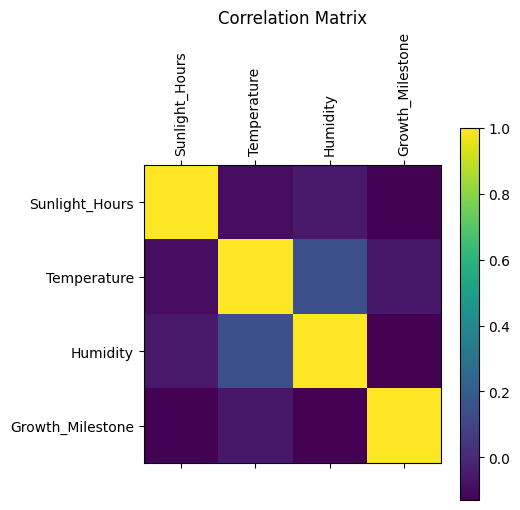

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Prepocessing

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [ ]:
# Drop rows with missing values
df.dropna(subset=['Water_Frequency', 'Fertilizer_Type'], inplace=True)
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [ ]:
# Fill missing values in numerical features with column's mean value
df['Sunlight_Hours'].fillna(df['Sunlight_Hours'].mean(), inplace=True)
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

#you can also use dictionary and run loop to replace null values with mean
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,25.016270,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [ ]:
df.shape

(191, 7)

In [ ]:
#check for total null value for each feature
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,0
Fertilizer_Type,0
Temperature,0
Humidity,0
Growth_Milestone,0


In [ ]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])
df.isnull().sum()
df.shape

(191, 13)

In [ ]:
df.head()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,False,True,False,True,False,False,True,False,False
1,4.033133,28.919484,52.422276,1,False,False,True,False,False,True,False,False,True
2,8.892769,23.179059,44.660539,0,False,True,False,True,False,False,False,True,False
3,8.241144,18.465886,46.433227,0,False,True,False,True,False,False,False,True,False
4,8.374043,25.016270,63.625923,0,False,False,True,True,False,False,False,False,True


In [ ]:
df.shape

(191, 13)

# Implementing AdaBoost using Scikit-learn Library

sklearn AdaBoost reference: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [ ]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['Growth_Milestone'], axis=1)
# df['Growth_Milestone']= df['Growth_Milestone'].replace(0, -1)
y = df['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (152, 12)
X_test shape: (39, 12)
y_train shape: (152,)
y_test shape: (39,)


In [ ]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=0.1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

abc = AdaBoostClassifier(n_estimators=5,learning_rate=0.3, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

abc = AdaBoostClassifier(n_estimators=5,learning_rate=0.4, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.645
Accuracy score (validation): 0.513
Accuracy score (training): 0.638
Accuracy score (validation): 0.667
Accuracy score (training): 0.638
Accuracy score (validation): 0.667


In [ ]:
abc = AdaBoostClassifier(n_estimators=10,learning_rate=0.1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

abc = AdaBoostClassifier(n_estimators=10,learning_rate=0.3, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

abc = AdaBoostClassifier(n_estimators=10,learning_rate=0.4, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.651
Accuracy score (validation): 0.538
Accuracy score (training): 0.697
Accuracy score (validation): 0.641
Accuracy score (training): 0.671
Accuracy score (validation): 0.667


In [ ]:
abc = AdaBoostClassifier(n_estimators=15,learning_rate=0.1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

abc = AdaBoostClassifier(n_estimators=15,learning_rate=0.3, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

abc = AdaBoostClassifier(n_estimators=15,learning_rate=0.4, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.638
Accuracy score (validation): 0.667
Accuracy score (training): 0.691
Accuracy score (validation): 0.590
Accuracy score (training): 0.684
Accuracy score (validation): 0.641
